In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load =  os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban

In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   111953927754
8     South Karenland  2019-01-08 03:28:48  35.09  7995623208694
9       North Jasmine  2019-03-09 06:26:29  42.81  5327642267789

In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [16]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [17]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

city                 date   fare        ride_id  \
2250   Randallchester  2019-04-13 11:13:31  43.22  1076079536213   
2251      North Holly  2019-02-02 14:54:00  12.42  1985256326182   
2252      Michaelberg  2019-03-27 18:27:34  54.85  4421836952718   
2253  Lake Latoyabury  2019-02-23 21:12:24  47.90  3269652929887   
2254  Lake Latoyabury  2019-05-06 08:57:56  51.80  4018025271936   

      driver_count   type  
2250             9  Rural  
2251             8  Rural  
2252             6  Rural  
2253             2  Rural  
2254             2  Rural

In [18]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [20]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [22]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

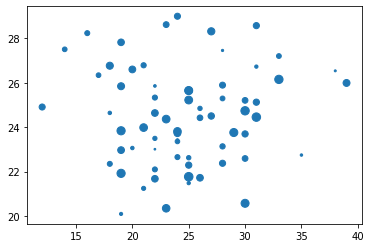

In [24]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

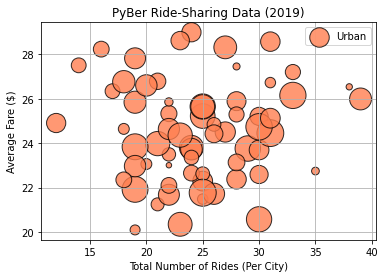

In [25]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

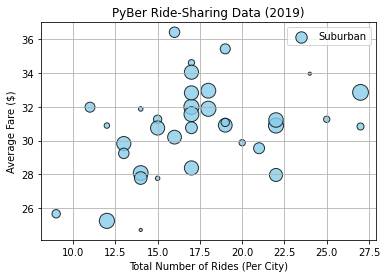

In [26]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

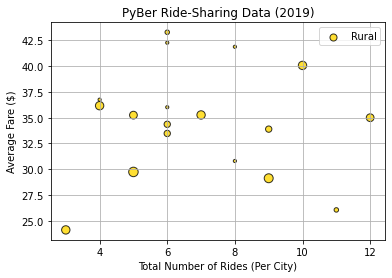

In [27]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

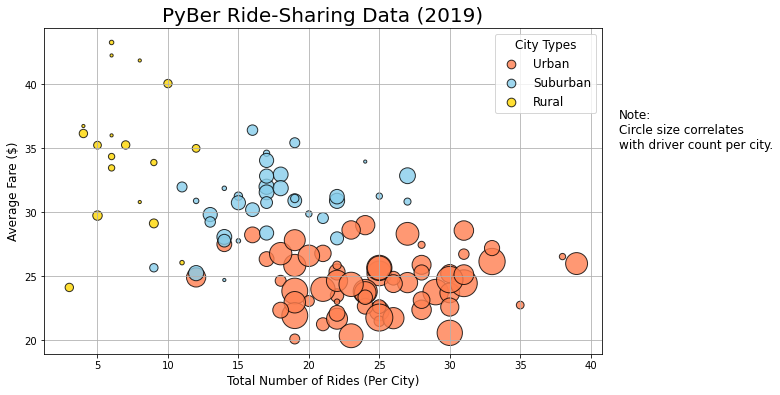

In [28]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")
# Save the figure.
Fig1Out = os.path.join("analysis","Fig1.png")
plt.savefig(Fig1Out)


In [29]:
# Get summary statistics.
urban_cities_df.describe()

fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000

In [30]:
# Get summary statistics.
urban_cities_df.describe()

fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000

In [31]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [32]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [33]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [34]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [35]:
# Get the fares for the each type.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [36]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [37]:
# Get the driver count data from the areas cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

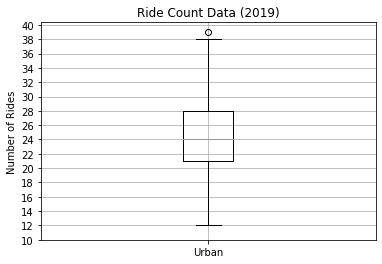

In [38]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

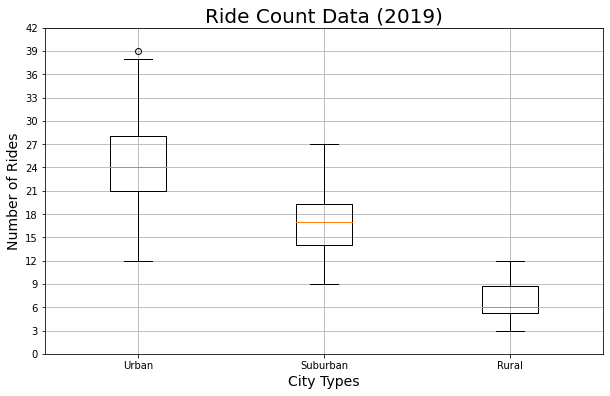

In [39]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
Fig2Out = os.path.join("analysis","Fig2.png")
plt.savefig(Fig2Out)
plt.show()

In [40]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


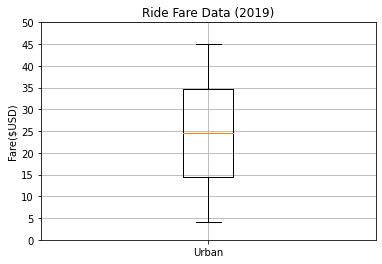

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [41]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

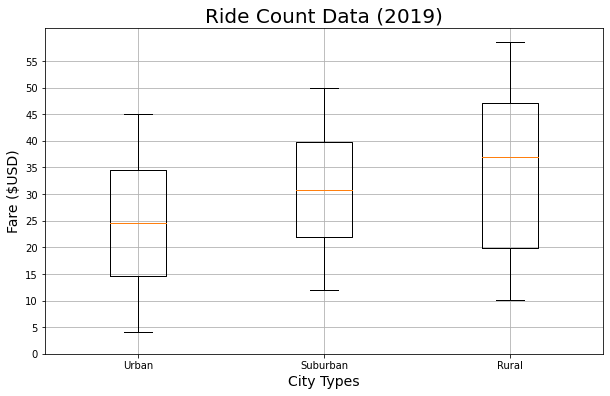

In [42]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# Save the figure.
Fig3Out = os.path.join("analysis","Fig3.png")
plt.savefig(Fig3Out)
plt.show()

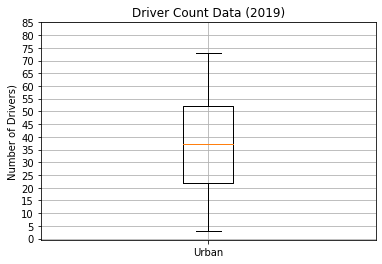

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [43]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

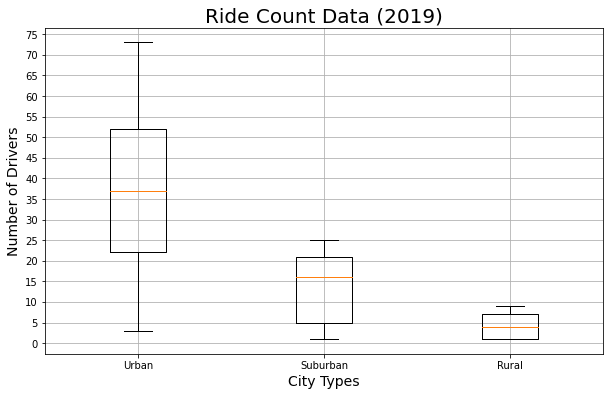

In [44]:
# Add all ride count box-and-whisker plots to the same graph. - Driver Count Data
x_labels = ["Urban", "Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
# Save the figure.
Fig4Out = os.path.join("analysis","Fig4.png")
plt.savefig(Fig4Out)
plt.show()

In [45]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [46]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [47]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

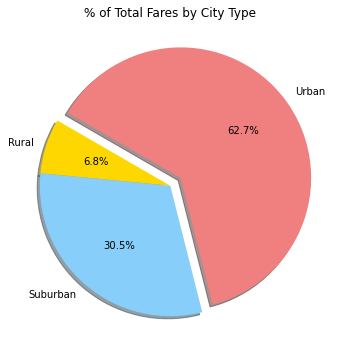

In [48]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
Fig5Out = os.path.join("analysis","Fig5.png")
plt.savefig(Fig5Out)
# Show Figure
plt.show()

In [49]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

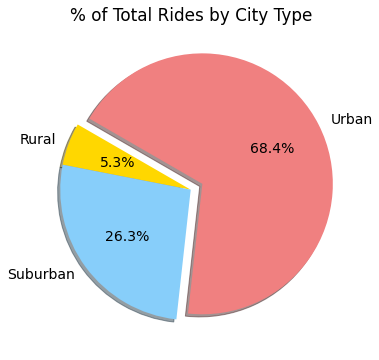

In [50]:
# Build Pie Chart - Total Rides
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
Fig6Out = os.path.join("analysis","Fig6.png")
plt.savefig(Fig6Out)
# Show Figure
plt.show()

In [51]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

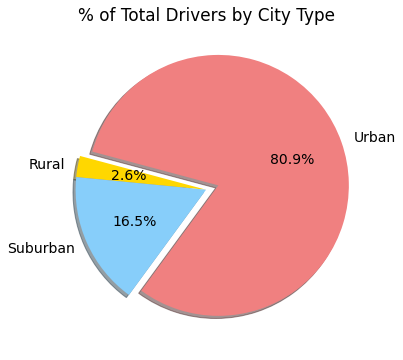

In [52]:
# Build Pie Chart - Total Drivers
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
Fig7Out = os.path.join("analysis","Fig7.png")
plt.savefig(Fig7Out)
# Show Figure
plt.show()

In [53]:
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [54]:
# Challenge Work Below

# Create Summary Data From Grouped By Type
# Calculate Total Rides
TotalRides = pyber_data_df.groupby(["type"]).count()["ride_id"]
TotalRides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [55]:
# Calculate Total Drivers
TotalDrivers = city_data_df.groupby(["type"]).sum()["driver_count"]
TotalDrivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [56]:
# Calculate Total Fares
TotalFares = pyber_data_df.groupby(["type"]).sum()["fare"]
TotalFares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [57]:
# Combine Total Rides, Total Drivers and Total Fares into DataFrame
# Combine each Series for average math scores by school into single DataFrame.
PyBerSummaryTableDF = pd.DataFrame({
               "Total Rides": TotalRides,
               "Total Drivers": TotalDrivers,
               "Total Fares": TotalFares})


In [58]:
#Add average Fare per ride
PyBerSummaryTableDF["Average Fare per Ride"] = PyBerSummaryTableDF["Total Fares"]/PyBerSummaryTableDF["Total Rides"]

In [59]:
#Add average Fare per driver
PyBerSummaryTableDF["Average Fare per Driver"] = PyBerSummaryTableDF["Total Fares"]/PyBerSummaryTableDF["Total Drivers"]

In [60]:
# Format the Table
PyBerSummaryTableDF["Total Rides"] = PyBerSummaryTableDF["Total Rides"].map("{:,.0f}".format)
PyBerSummaryTableDF["Total Drivers"] = PyBerSummaryTableDF["Total Drivers"].map("{:,.0f}".format)
PyBerSummaryTableDF["Total Fares"] = PyBerSummaryTableDF["Total Fares"].map("${:,.2f}".format)
PyBerSummaryTableDF["Average Fare per Ride"] = PyBerSummaryTableDF["Average Fare per Ride"].map("${:,.2f}".format)
PyBerSummaryTableDF["Average Fare per Driver"] = PyBerSummaryTableDF["Average Fare per Driver"].map("${:,.2f}".format)
PyBerSummaryTableDF.index.name = None
PyBerSummaryTableDF

Total Rides Total Drivers Total Fares Average Fare per Ride  \
Rural            125            78   $4,327.93                $34.62   
Suburban         625           490  $19,356.33                $30.97   
Urban          1,625         2,405  $39,854.38                $24.53   

         Average Fare per Driver  
Rural                     $55.49  
Suburban                  $39.50  
Urban                     $16.57

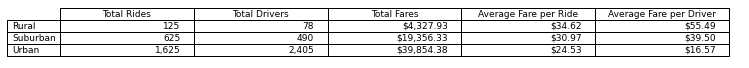

In [61]:
# From stack Overflow - saving a datafrom as a png to include in the report - https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png

from pandas.plotting import table # EDIT: see deprecation warnings below

fig, ax = plt.subplots(figsize=(12, 1)) # set size frame

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, PyBerSummaryTableDF, loc="upper right")  # where df is your data frame
Table1Out = os.path.join("analysis","table1.png")
plt.savefig(Table1Out)

In [62]:
pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)
pyber_data_df.head()

City                 Date   Fare        Ride Id  No. Drivers  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873            5   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577           72   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003           57   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178           34   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344           46   

  City Type  
0     Urban  
1     Urban  
2     Urban  
3     Urban  
4     Urban

In [63]:
pyber_data_df.set_index("Date")

City   Fare        Ride Id  No. Drivers  \
Date                                                                         
2019-01-14 10:14:22  Lake Jonathanshire  13.83  5739410935873            5   
2019-03-04 18:24:09  South Michelleport  30.24  2343912425577           72   
2019-02-24 04:29:00  Port Samanthamouth  33.44  2005065760003           57   
2019-02-10 23:22:03          Rodneyfort  23.44  5149245426178           34   
2019-03-06 04:28:35          South Jack  34.58  3908451377344           46   
...                                 ...    ...            ...          ...   
2019-04-29 17:04:39         Michaelberg  13.38  8550365057598            6   
2019-01-30 00:05:47     Lake Latoyabury  20.76  9018727594352            2   
2019-02-10 21:03:50         North Jaime  11.11  2781339863778            1   
2019-05-07 19:22:15        West Heather  44.94  4256853490277            4   
2019-04-25 10:20:13          Newtonview  55.84  9990581345298            1   

                    City Type  
Date                           
2019-01-14 10:14:22     Urban  
2019-03-04 18:24:09     Urban  
2019-02-24 04:29:00     Urban  
2019-02-10 23:22:03     Urban  
2019-03-06 04:28:35     Urban  
...                       ...  
2019-04-29 17:04:39     Rural  
2019-01-30 00:05:47     Rural  
2019-02-10 21:03:50     Rural  
2019-05-07 19:22:15     Rural  
2019-04-25 10:20:13     Rural  

[2375 rows x 5 columns]

In [64]:
OnlyFaresDF  = pyber_data_df[['Date', 'City Type', 'Fare']].copy()
OnlyFaresDF.head()

Date City Type   Fare
0  2019-01-14 10:14:22     Urban  13.83
1  2019-03-04 18:24:09     Urban  30.24
2  2019-02-24 04:29:00     Urban  33.44
3  2019-02-10 23:22:03     Urban  23.44
4  2019-03-06 04:28:35     Urban  34.58

In [65]:
OnlyFaresDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2375 non-null   object 
 1   City Type  2375 non-null   object 
 2   Fare       2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [66]:
OnlyFaresDF["Date"] = pd.to_datetime(OnlyFaresDF["Date"])

In [67]:
OnlyFaresDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2375 non-null   datetime64[ns]
 1   City Type  2375 non-null   object        
 2   Fare       2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [68]:
OnlyFaresDF = OnlyFaresDF.set_index(pd.DatetimeIndex(OnlyFaresDF["Date"]))

In [69]:
OnlyFaresDF.head()

Date City Type   Fare
Date                                                    
2019-01-14 10:14:22 2019-01-14 10:14:22     Urban  13.83
2019-03-04 18:24:09 2019-03-04 18:24:09     Urban  30.24
2019-02-24 04:29:00 2019-02-24 04:29:00     Urban  33.44
2019-02-10 23:22:03 2019-02-10 23:22:03     Urban  23.44
2019-03-06 04:28:35 2019-03-06 04:28:35     Urban  34.58

In [70]:
OnlyFaresDF.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2375 non-null   datetime64[ns]
 1   City Type  2375 non-null   object        
 2   Fare       2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [71]:
OnlyFaresDF = OnlyFaresDF.drop(columns = ["Date"])

In [72]:
OnlyFaresDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [73]:
OnlyFaresDF.head()

City Type   Fare
Date                                
2019-01-14 10:14:22     Urban  13.83
2019-03-04 18:24:09     Urban  30.24
2019-02-24 04:29:00     Urban  33.44
2019-02-10 23:22:03     Urban  23.44
2019-03-06 04:28:35     Urban  34.58

In [74]:
# Create Summary Data for fares by date and City Type
TypeFarebyDate = OnlyFaresDF.groupby(["Date","City Type"]).sum()["Fare"]
TypeFarebyDate

Date                 City Type
2019-01-01 00:08:16  Urban        37.91
2019-01-01 00:46:46  Suburban     47.74
2019-01-01 02:07:24  Suburban     24.07
2019-01-01 03:46:50  Urban         7.57
2019-01-01 05:23:21  Urban        10.75
                                  ...  
2019-05-08 04:20:00  Urban        21.99
2019-05-08 04:39:49  Urban        18.45
2019-05-08 07:29:01  Urban        18.55
2019-05-08 11:38:35  Urban        19.77
2019-05-08 13:10:18  Urban        18.04
Name: Fare, Length: 2375, dtype: float64

In [75]:
TypeFarebyDateDF = pd.DataFrame(TypeFarebyDate)

In [76]:
TypeFarebyDateDF.head()

Fare
Date                City Type       
2019-01-01 00:08:16 Urban      37.91
2019-01-01 00:46:46 Suburban   47.74
2019-01-01 02:07:24 Suburban   24.07
2019-01-01 03:46:50 Urban       7.57
2019-01-01 05:23:21 Urban      10.75

In [77]:
TypeFarebyDateDF.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2375 entries, (Timestamp('2019-01-01 00:08:16'), 'Urban') to (Timestamp('2019-05-08 13:10:18'), 'Urban')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    2375 non-null   float64
dtypes: float64(1)
memory usage: 124.2+ KB


In [78]:
TypeFarePivot = pd.pivot_table(TypeFarebyDateDF, values='Fare', index=["Date"],
                    columns=['City Type'], aggfunc=np.sum)

In [79]:
TypeFarePivot

City Type            Rural  Suburban  Urban
Date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-05-08 04:20:00    NaN       NaN  21.99
2019-05-08 04:39:49    NaN       NaN  18.45
2019-05-08 07:29:01    NaN       NaN  18.55
2019-05-08 11:38:35    NaN       NaN  19.77
2019-05-08 13:10:18    NaN       NaN  18.04

[2375 rows x 3 columns]

In [80]:
TypeFarePivot20191Q = TypeFarePivot.loc['2019-01-01':'2019-04-28']

In [81]:
TypeFarePivot20191Q

City Type            Rural  Suburban  Urban
Date                                       
2019-01-01 00:08:16    NaN       NaN  37.91
2019-01-01 00:46:46    NaN     47.74    NaN
2019-01-01 02:07:24    NaN     24.07    NaN
2019-01-01 03:46:50    NaN       NaN   7.57
2019-01-01 05:23:21    NaN       NaN  10.75
...                    ...       ...    ...
2019-04-28 14:28:36    NaN       NaN  11.46
2019-04-28 16:29:16    NaN       NaN  36.42
2019-04-28 17:26:52    NaN       NaN  31.43
2019-04-28 17:38:09    NaN     34.87    NaN
2019-04-28 19:35:03    NaN     16.96    NaN

[2196 rows x 3 columns]

In [82]:
TypeFarePivot20191Q.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [83]:
TypeFareForPlot = TypeFarePivot20191Q.resample("W").sum()
TypeFareForPlot.head()

City Type    Rural  Suburban    Urban
Date                                 
2019-01-06  187.92    721.60  1661.68
2019-01-13   67.65   1105.13  2050.43
2019-01-20  306.00   1218.20  1939.02
2019-01-27  179.69   1203.28  2129.51
2019-02-03  333.08   1042.79  2086.94

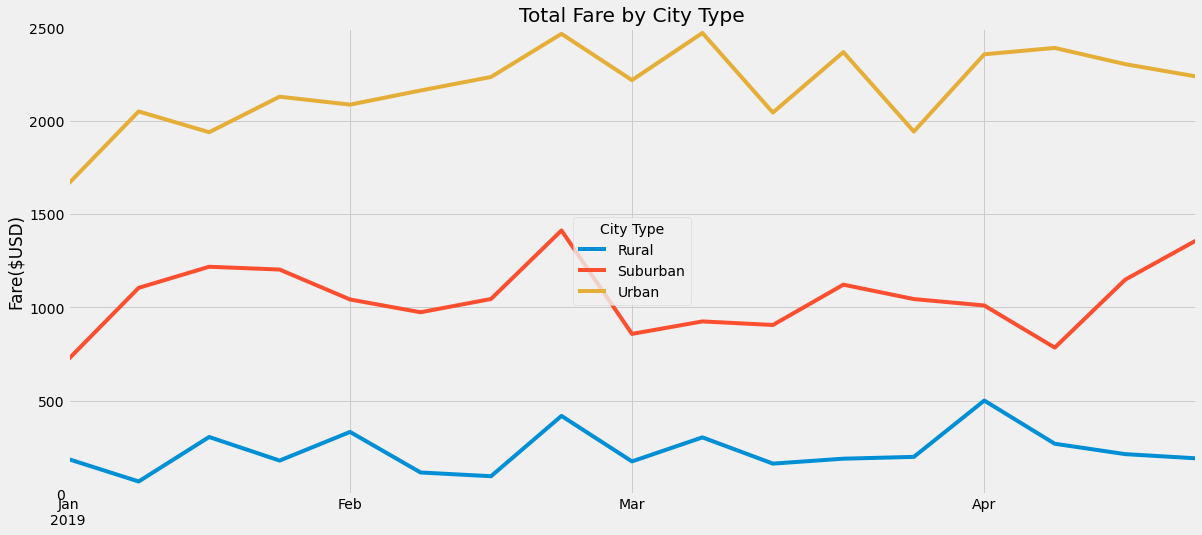

In [106]:
# Create the plot

plt.style.use('fivethirtyeight')
TypeFareForPlot.plot(figsize = [18,8], grid = "True", title = "Total Fare by City Type")
plt.ylabel("Fare($USD)")
plt.xlabel("")
plt.axes()
plt.ylim(0, 2500)
Fig8Out = os.path.join("analysis","Fig8.png")
plt.savefig(Fig8Out)
# Show Figure
plt.show()
